In [1]:
import pandas as pd # for analysis
import numpy as np #for analysis
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization
from scipy.stats import norm # for analysis
from sklearn.preprocessing import StandardScaler #for analysis
from scipy import stats #for analysis
%matplotlib inline
import gc #garbage collector interface
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import os #OS interface
print(os.listdir("data"))

['test.csv', 'train.csv', 'merchants.csv', 'Data_Dictionary.xlsx', 'historical_transactions.csv', 'sample_submission.csv', 'new_merchant_transactions.csv']


* <b>train.csv</b> - the training set <br>
* <b>test.csv</b> - the test set<br>
* <b>sample_submission.csv</b> - a sample submission file in the correct format - contains all card_ids you are expected to predict for.<br>
* <b>historical_transactions.csv</b> - up to 3 months' worth of historical transactions for each card_id <br>
* <b>merchants.csv</b> - additional information about all merchants / merchant_ids in the dataset. <br>
* <b>new_merchant_transactions.csv</b> - two months' worth of data for each card_id containing ALL purchases that card_id made at merchant_ids that were not visited in the historical data.



In [10]:
train_df = pd.read_csv(os.path.join("data","train.csv"), 
                       parse_dates = ["first_active_month"]) # parse_dates param in order to have a correct date format

In [11]:
train_df.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749


* <b>card_id</b> -	Unique card identifier<br>
* <b>first_active_month</b> -	'YYYY-MM', month of first purchase<br>
* <b>feature_1</b> -	Anonymized card categorical feature<br>
* <b>feature_2</b> -	Anonymized card categorical feature<br>
* <b>feature_3</b>	- Anonymized card categorical feature<br>
* <b>target</b> -	Loyalty numerical score calculated 2 months after historical and evaluation period<br>


In [13]:
test_df = pd.read_csv("data/test.csv", parse_dates = ["first_active_month"])

print("Shape of train dataset: ", train_df.shape)
print("Shape of test dataset: ", test_df.shape)

Shape of train dataset:  (201917, 6)
Shape of test dataset:  (123623, 5)


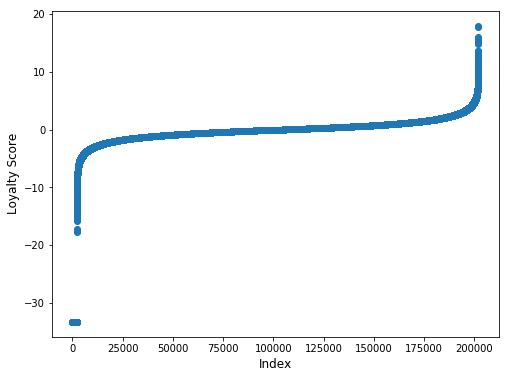

In [14]:
target_col = "target"
plt.figure(figsize = (8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df[target_col].values))
plt.xlabel('Index', fontsize=12)
plt.ylabel('Loyalty Score', fontsize=12)
plt.show()

<function matplotlib.pyplot.show>

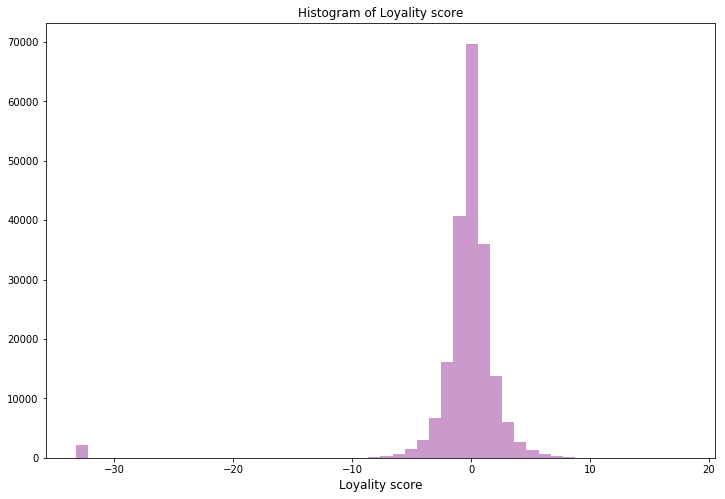

In [15]:
plt.figure(figsize = (12,8))
sns.distplot(train_df[target_col].values, kde = False, color = "purple")
plt.title("Histogram of Loyality score")
plt.xlabel("Loyality score",fontsize = 12)
plt.show

In [16]:
print("Number of outliers: ",(train_df[target_col]<-30).sum())


Number of outliers:  2207


<b>First Active Month</b>

In this section, let us see if there are any distribution change between train and test sets with respect to first active month of the card.


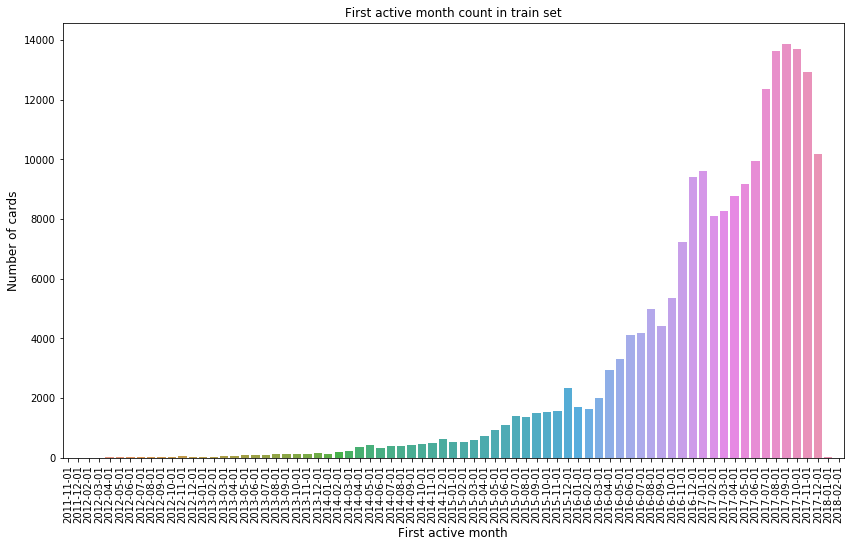

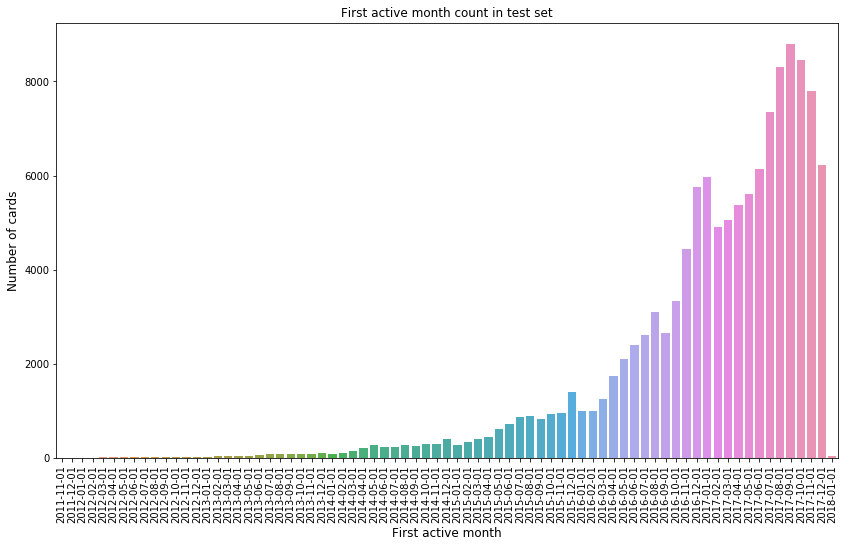

In [17]:
cnt_srs = train_df['first_active_month'].dt.date.value_counts()
cnt_srs = cnt_srs.sort_index()
#cnt_srs.head(10)
plt.figure(figsize = (14,8))
sns.barplot(cnt_srs.index, cnt_srs.values)
plt.xticks(rotation = 'vertical')
plt.xlabel('First active month', fontsize = 12)
plt.ylabel('Number of cards', fontsize = 12)
plt.title("First active month count in train set")
plt.show()

cnt_srs = test_df['first_active_month'].dt.date.value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize = (14,8))
sns.barplot(cnt_srs.index, cnt_srs.values)
plt.xticks(rotation = 'vertical')
plt.xlabel('First active month', fontsize = 12)
plt.ylabel('Number of cards', fontsize = 12)
plt.title("First active month count in test set")
plt.show()

Looks like the distribution is kind of similar between train and test set. So we need not really have to do time based split I think.


<b>Feature 1, 2, 3</b>

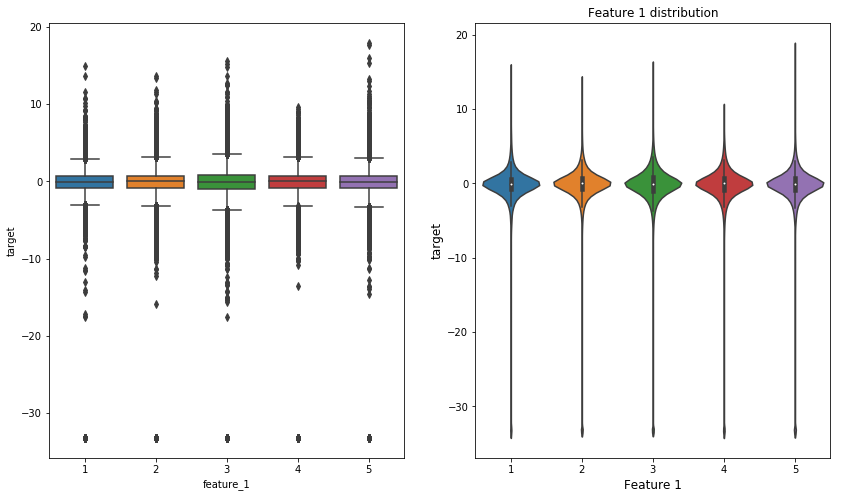

In [18]:
# for Feature 1
fig, ((ax1, ax2)) = plt.subplots(nrows = 1, ncols = 2, figsize = (14,8))
data = pd.concat([train_df['target'], train_df['feature_1']], axis = 1)
fig = sns.boxplot(x = 'feature_1', y = target_col, data = data,ax = ax1)
sns.violinplot(x = 'feature_1', y = target_col, data = data,scale = 'width', ax = ax2)
plt.xlabel('Feature 1', fontsize = 12)
plt.ylabel('target', fontsize = 12)
plt.title('Feature 1 distribution')
plt.show()

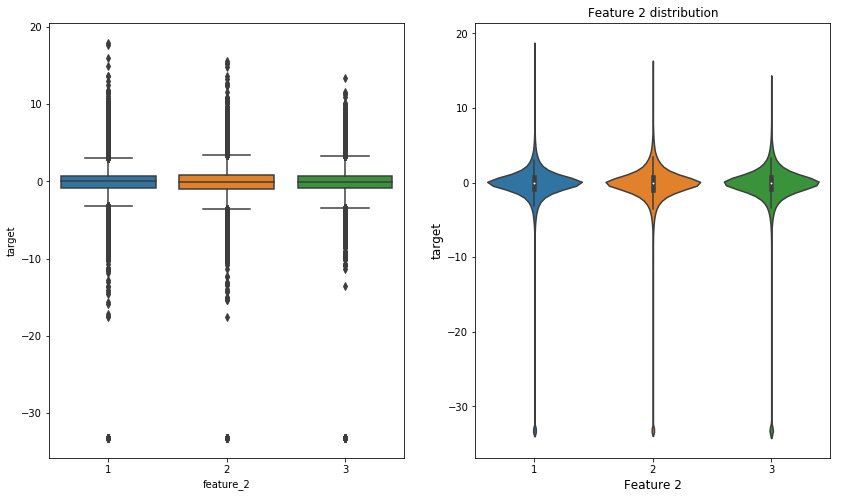

In [19]:
# for feature 2
fig, ((ax1, ax2)) =  plt.subplots(nrows = 1, ncols = 2, figsize = (14,8))
data = pd.concat([train_df['feature_2'], train_df['target']], axis = 1)
fig = sns.boxplot(x = 'feature_2', y = target_col, data = data, ax = ax1)
sns.violinplot(x = 'feature_2', y = target_col, data = data, scale = 'width', ax = ax2)
plt.xlabel('Feature 2', fontsize = 12)
plt.ylabel('target', fontsize = 12)
plt.title('Feature 2 distribution')
plt.show()



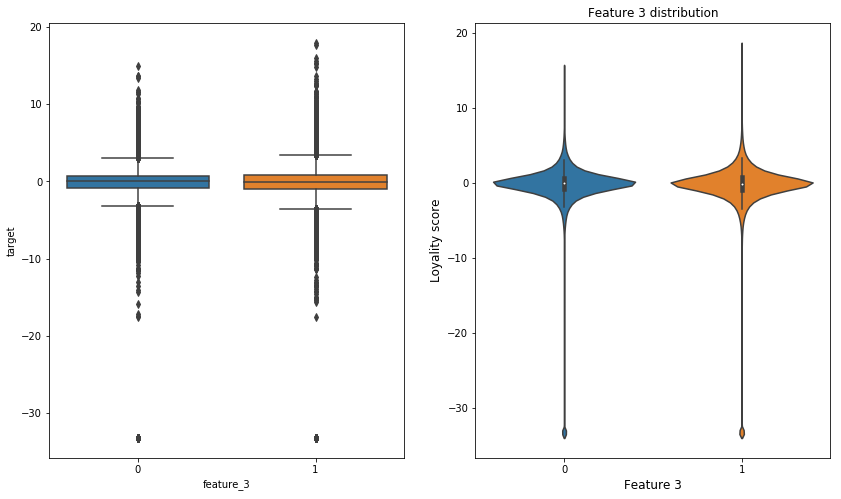

In [20]:
#for feature 3
fig, ((ax1, ax2)) = plt.subplots(nrows = 1, ncols = 2, figsize = (14,8))
data = pd.concat([train_df['feature_3'], train_df['target']], axis = 1)
fig = sns.boxplot(x = 'feature_3', y = target_col, data = data, ax = ax1)
sns.violinplot(x = 'feature_3', y = target_col, data = data, scale = 'width', ax = ax2)
plt.xlabel('Feature 3', fontsize = 12)
plt.ylabel('Loyality score', fontsize = 12)
plt.title('Feature 3 distribution')
plt.show()

In [21]:
train_df.corr() 

,feature_1,feature_2,feature_3,target
feature_1,1.000000,-0.130969,0.583092,-0.014251
feature_2,-0.130969,1.000000,0.060925,-0.006242
feature_3,0.583092,0.060925,1.000000,-0.008125
target,-0.014251,-0.006242,-0.008125,1.000000


can we say that feature_1 is highly correlated with feature_3 (0.583)? <br>
Not highly correlated, but slightly. Since the features are categorical, correlation is less important

target-feature has low correlation for each feature

In [25]:
train_df['target'].describe()

count    201917.000000
mean         -0.393636
std           3.850500
min         -33.219281
25%          -0.883110
50%          -0.023437
75%           0.765453
max          17.965068
Name: target, dtype: float64

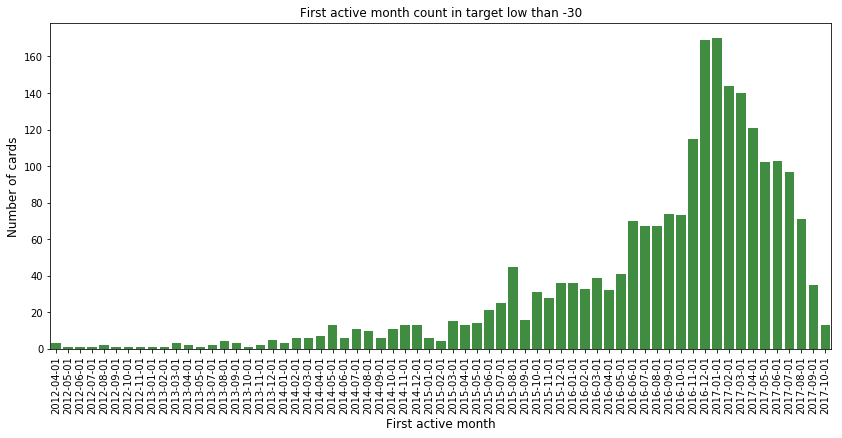

In [26]:
# Code in https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-elo
# SRK - Simple Exploration Notebook 
train_low_m30 = train_df[train_df['target']<-30]
cnt_srs = train_low_m30['first_active_month'].dt.date.value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('First active month', fontsize=12)
plt.ylabel('Number of cards', fontsize=12)
plt.title("First active month count in target low than -30")
plt.show()

In [27]:
train_low_m30.head(10)

,first_active_month,card_id,feature_1,feature_2,feature_3,target
64,2017-09-01,C_ID_8186f3fcc1,3,1,1,-33.219281
92,2015-05-01,C_ID_b9379a30ea,3,3,1,-33.219281
125,2015-10-01,C_ID_e9120f535c,3,3,1,-33.219281
151,2017-03-01,C_ID_65715cb80d,4,2,0,-33.219281
225,2017-01-01,C_ID_ae77d244b6,2,1,0,-33.219281
248,2015-07-01,C_ID_c4262c902e,5,1,1,-33.219281
254,2017-03-01,C_ID_6a2c823e5f,2,1,0,-33.219281
386,2017-06-01,C_ID_98e1cb10b6,2,3,0,-33.219281
467,2017-03-01,C_ID_eb8175721a,4,1,0,-33.219281
515,2016-04-01,C_ID_a2580006bf,4,2,0,-33.219281


<b> Missing values</b>

In [28]:
#in train dataset
total = train_df.isnull().sum().sort_values(ascending = False)
percent = (train_df.isnull().sum()/train_df.isnull().count()*100).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total','Percent'] )
missing_data

,Total,Percent
target,0,0.0
feature_3,0,0.0
feature_2,0,0.0
feature_1,0,0.0
card_id,0,0.0
first_active_month,0,0.0


In [29]:
#in test dataset
total = test_df.isnull().sum().sort_values(ascending = False)
percent = (test_df.isnull().sum()/test_df.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # axis = 1 because it concatenates 2 columns, not rows
missing_data.head(2)

,Total,Percent
first_active_month,1,0.000809
feature_3,0,0.000000


<b> Exploring historical_transactions.csv </b>

In [31]:
hist_df = pd.read_csv("data/historical_transactions.csv")
hist_df.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [35]:
print("Shape of historical_transactions.csv", hist_df.shape)

Shape of historical_transactions.csv (29112361, 14)


<b> Exploring new_merchant_transactions.csv</b>

In [36]:
new_merchant_df = pd.read_csv("data/new_merchant_transactions.csv")
print("Shape of new_merchant_transactions.csv", new_merchant_df.shape)
new_merchant_df.head()

Shape of new_merchant_transactions.csv (1963031, 14)


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


* <b>card_id</b> : Card identifier <br>
* <b>month_lag</b> : month lag to reference date <br>
* <b>purchase_date</b> : Purchase date <br>
* <b>authorized_flag</b> : Y' if approved, 'N' if denied <br>
* <b>category_3</b> : anonymized category <br>
* <b>installments </b>: number of installments of purchase <br>
* <b>category_1</b> : anonymized category <br>
* <b>merchant_category_id</b> : Merchant category identifier (anonymized ) <br>
* <b>subsector_id</b> : Merchant category group identifier (anonymized )<br>
* <b>merchant_id </b>: Merchant identifier (anonymized) <br>
* <b>purchase_amount </b> : Normalized purchase amount <br>
* <b>city_id </b>: City identifier (anonymized ) <br>
* <b>state_id</b> : State identifier (anonymized ) <br>
* <b>category_2</b> : anonymized category <br>



In [37]:
# checking missing data
total = new_merchant_df.isnull().sum().sort_values(ascending = False)
percent = (new_merchant_df.isnull().sum()/new_merchant_df.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
category_2,111745,5.692473
category_3,55922,2.848758
merchant_id,26216,1.335486
subsector_id,0,0.000000
state_id,0,0.000000
purchase_date,0,0.000000
purchase_amount,0,0.000000
month_lag,0,0.000000
merchant_category_id,0,0.000000
installments,0,0.000000
